# This notebook presents a simulation of a pool of Renshaw cells (RC) with a current injected (iInjected) in their soma.

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from InterneuronPool import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confInjectedCurrentRenshawCellPool.rmto')
conf.simDuration_ms = 500 # Here I change simulation duration without changing the Configuration file.

In [3]:
# Time vector for the simulation
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

membPotential = np.zeros_like(t, dtype = 'd')

In [5]:
pools = dict()
pools[0] = InterneuronPool(conf, 'RC')

Syn = SynapsesFactory(conf, pools)



Interneuron Pool of RC built
Synaptic Noise on RC built
All the 350 synapses were built


In [9]:
# The simulation  itself

tic = time.clock()
for i in xrange(0,len(t)-1):
    # Here you can change the injected current in the Resnhaw cell during the simulation
    for j in xrange(len(pools[0].unit)):
        pools[0].unit[j].iInjected = 5
    pools[1].atualizePool(t[i])    
    pools[0].atualizeInterneuronPool(t[i])
    membPotential[i] = pools[0].unit[175].v_mV # This command records the membrane potential of the RC with index 175.
toc = time.clock()
print str(toc - tic) + ' seconds'

363.657428 seconds


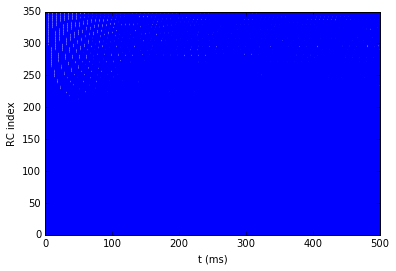

In [10]:
pools[0].listSpikes()

plt.plot(pools[0].poolSomaSpikes[:, 0],
    pools[0].poolSomaSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

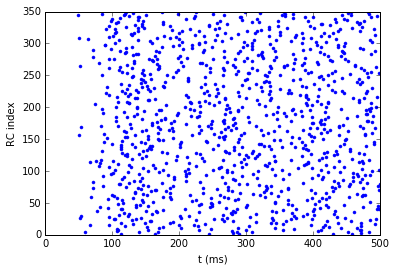

In [11]:
pools[1].listSpikes()

plt.plot(pools[1].poolTerminalSpikes[:, 0],
    pools[1].poolTerminalSpikes[:, 1]+1, '.')

plt.xlabel('t (ms)')
plt.ylabel('RC index')

plt.show()

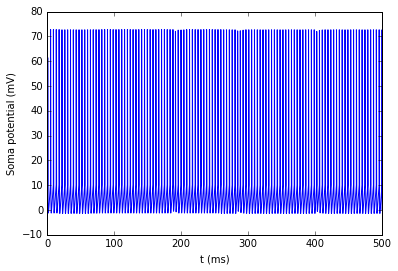

In [12]:
plt.figure()

plt.plot(t, membPotential, '-')

plt.xlabel('t (ms)')
plt.ylabel('Soma potential (mV)')

plt.show()

In [13]:
ISI = np.array([])
for i in xrange(0,len(pools[1].unit)):
    ISI = np.append(ISI, np.diff(np.reshape(np.array(pools[1].unit[i].terminalSpikeTrain), (-1,2))[:,0]))
print ISI

[ 131.1   185.4   125.5   168.3   191.15  118.2   197.95   80.7   168.5
  142.8   171.95  129.    120.5    70.3   112.15   59.25  201.7   114.95
  140.85  123.7   140.4    98.4   117.25  178.4   247.15  261.65  108.85
   76.5   167.2   155.65  195.1   104.2   197.    107.5   115.8   138.05
   73.35  150.95   98.85  195.3   128.25  124.1   110.65  153.3   122.3
   79.9    97.2    95.6   114.4   145.55   32.3   127.95  102.75  127.65
  149.3   145.35  135.2   108.35   91.5   129.05  102.4   209.35  131.1
  147.3   170.85   92.4   169.35  154.95  136.1   119.15  111.25  190.5
  115.85  159.8    90.05  177.7    62.8   114.9    88.25  172.7    93.4
  129.95  120.3   179.5   173.85  114.4    97.05   93.75  166.55  120.35
  175.8   140.55  162.85  228.7   164.4   122.3    95.45  246.7   159.55
  117.8    93.9   138.6    77.25  140.35  153.95  129.35  131.05   96.5
  112.3   181.6   141.9   190.35  110.35  136.6   139.3   107.05   94.9
  100.25  130.25  141.    126.45  139.95  165.35  117.7   

(array([  14.,   62.,  195.,  190.,  144.,   70.,   30.,   18.,    2.,    1.]),
 array([  32.3  ,   60.765,   89.23 ,  117.695,  146.16 ,  174.625,
         203.09 ,  231.555,  260.02 ,  288.485,  316.95 ]),
 <a list of 10 Patch objects>)

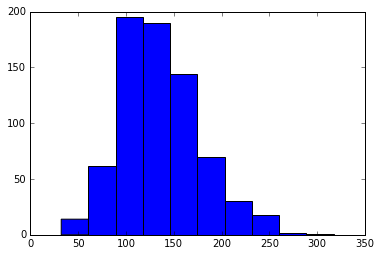

In [14]:
plt.figure()
plt.hist(ISI)